# Libraries

In [1]:
import numpy as np
import pandas as pd #I almost imported as Boris
import matplotlib.pyplot as plt

# Import file

Importing file

In [38]:
df = pd.read_csv('data/family_data.csv')
df.head(10)

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4
5,5,32,59,12,3,60,26,35,50,5,2,4
6,6,88,4,1,3,91,32,39,57,28,99,2
7,7,25,11,52,48,10,17,88,50,95,66,5
8,8,18,60,1,12,89,33,16,10,53,67,4
9,9,1,88,39,50,26,18,96,47,46,28,7


In [4]:
df.shape

(5000, 12)

## Plotting histogram

Ploting Histogram for each choice will get us the most chosen day

In [79]:
# We have more family_id and n_people in the dataframe. This code remove them so we can check Histograms only for Choice Days
choiceColumns = df.columns[1:-1]
choiceColumns

Index(['choice_0', 'choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5',
       'choice_6', 'choice_7', 'choice_8', 'choice_9'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

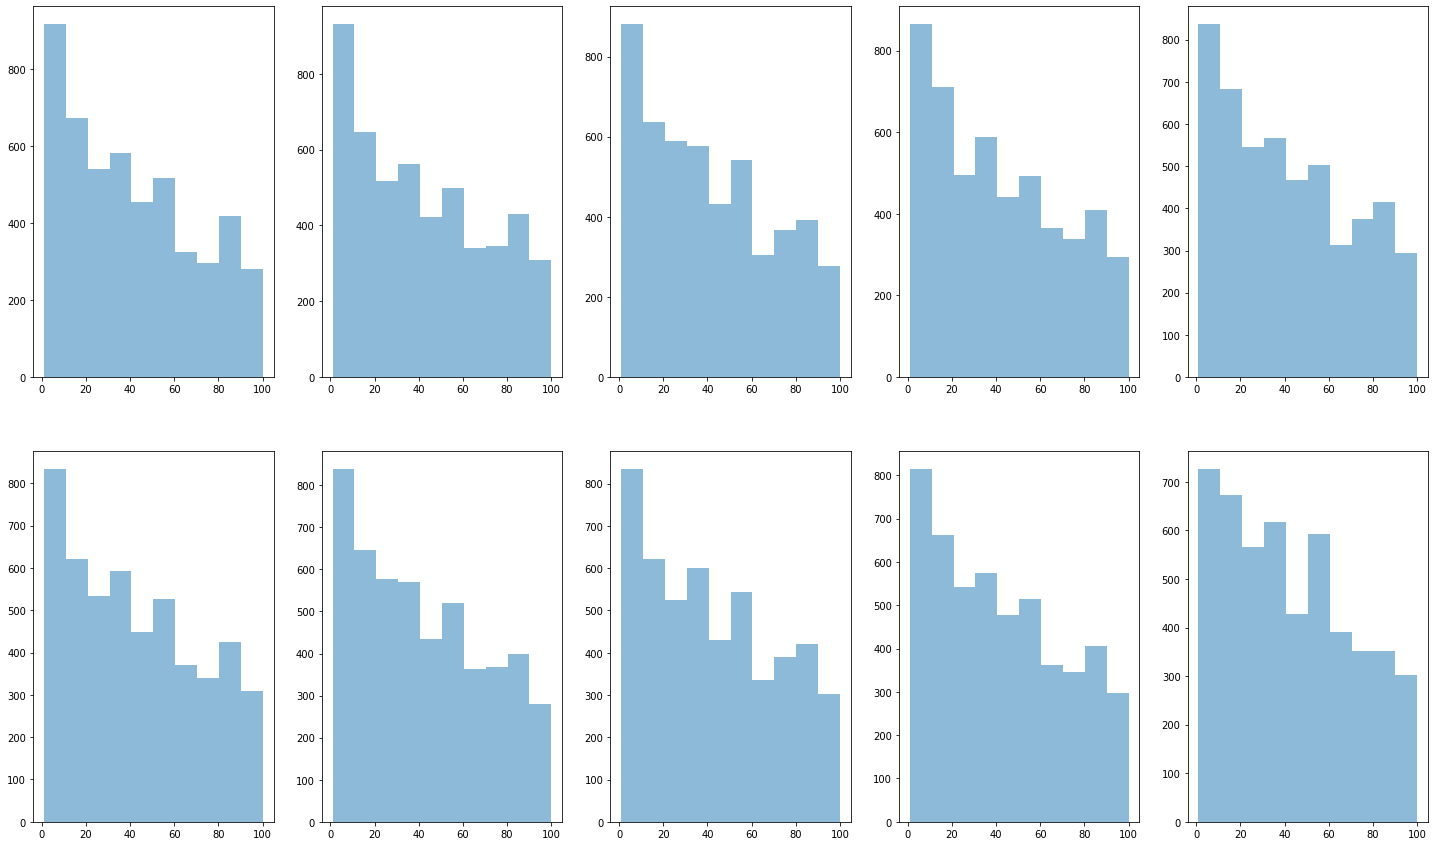

In [80]:
# Plot all histograms at once, with subplots
plt.figure()
plt.subplots(2,5,figsize=(25,15))
for i, column in enumerate(choiceColumns):
    plt.subplot(2,5,i+1)
    plt.hist(df[column], alpha=0.5)
plt.show()

So above we can check the frequency of families for each day. 
We can see that visits choice increases as we get closer to christmas.

Now, I am going to check how many people are in each visit day. not how many families, but how many people

In [60]:
# Define DataFrame to get how many people per day
df_numPeople = pd.DataFrame()
# Iterate on all Choice Columns
for column in choiceColumns:
    # Define a temporary dataframe to store each choice
    # My choice was to create a Dict first
    numPeopleDict = {}
    # Loop on every day from 1 to 100
    for i in range(1,101):
        # Get the SUM of people on each day
        numPeople = df[df[column] == i]['n_people'].sum()
        # Add value to Dict
        numPeopleDict[i] = numPeople
    # Convert Dict to Dataframe
    df_numPeople_inChoice = pd.DataFrame(numPeopleDict, index=[0])
    #Invert columns and rows
    df_numPeople_inChoice = df_numPeople_inChoice.T
    #Change name of column to be easier to read
    df_numPeople_inChoice.columns = [column]
    #save it to final Dataframe
    df_numPeople[column] = df_numPeople_inChoice[column]

In [ ]:
# Define DataFrame to get how many people per day
df_numPeople = pd.DataFrame()
# Iterate on all Choice Columns
for column in choiceColumns:
    # Define a temporary dataframe to store each choice
    # My choice was to create a Dict first
    numPeopleDict = {}
    # Loop on every day from 1 to 100
    for i in range(1,101):
        # Get the SUM of people on each day
        numPeople = df[df[column] == i]['n_people'].sum()
        # Add value to Dict
        numPeopleDict[i] = numPeople
    # Convert Dict to Dataframe
    df_numPeople_inChoice = pd.DataFrame(numPeopleDict, index=[0])
    #Invert columns and rows
    df_numPeople_inChoice = df_numPeople_inChoice.T
    #Change name of column to be easier to read
    df_numPeople_inChoice.columns = [column]
    #save it to final Dataframe
    df_numPeople[column] = df_numPeople_inChoice[column]

In [82]:
df_numPeople

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9
1,1576,1478,1337,1271,1147,1029,1002,1053,830,845
2,202,131,168,212,214,182,121,201,217,158
3,412,285,324,300,402,409,415,357,393,310
4,379,400,369,365,368,375,477,345,437,357
5,358,445,378,385,365,393,401,378,377,427
...,...,...,...,...,...,...,...,...,...,...
96,294,275,300,308,272,293,283,297,315,274
97,45,32,60,46,49,85,74,44,59,46
98,56,53,48,81,59,63,47,70,38,54
99,57,64,39,53,36,83,55,34,41,69


<Figure size 432x288 with 0 Axes>

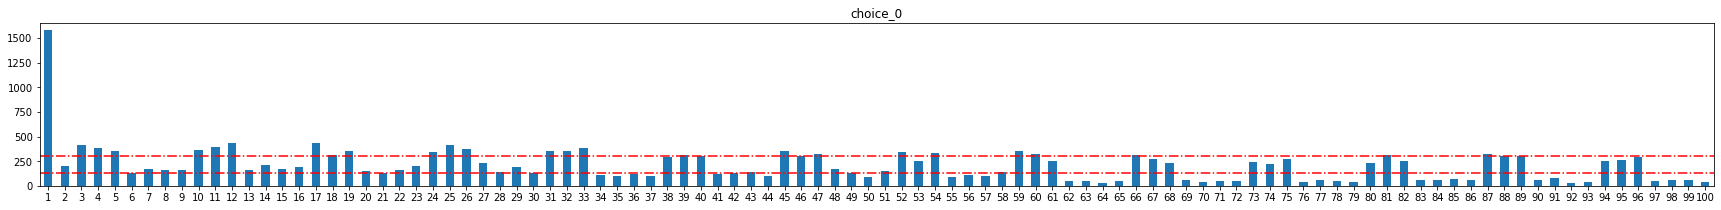

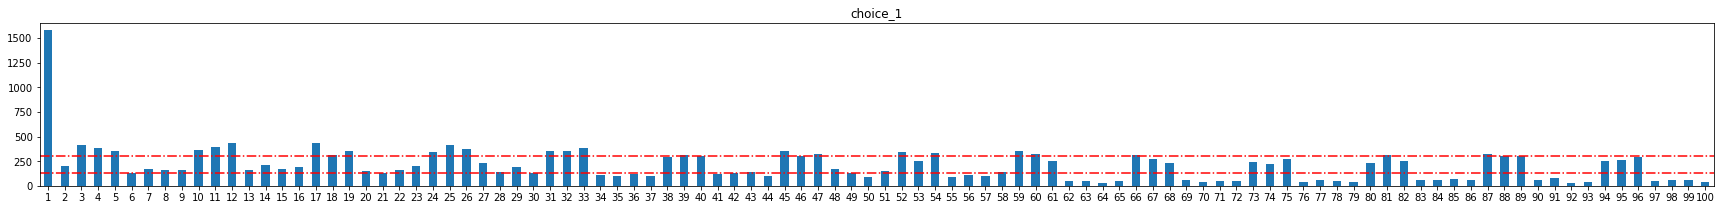

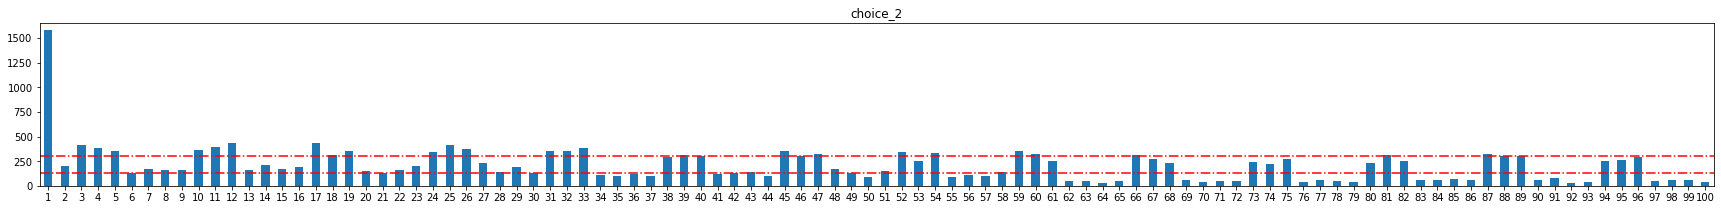

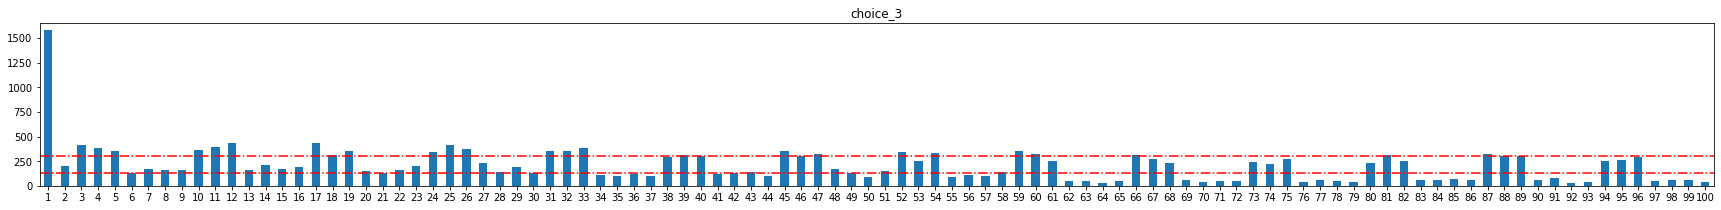

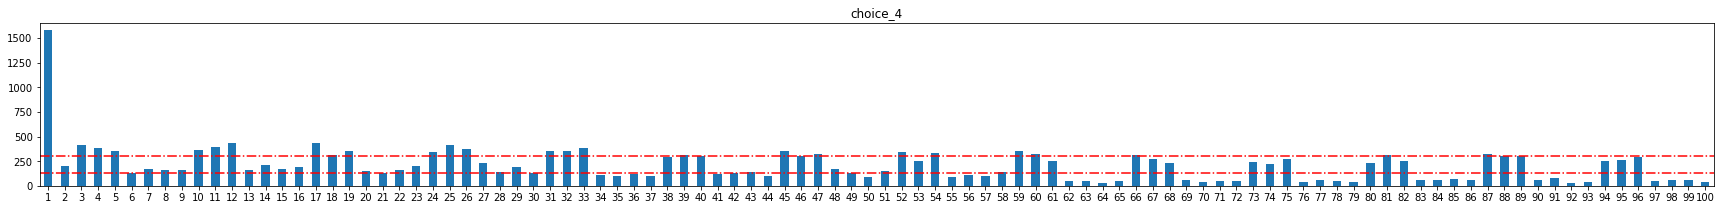

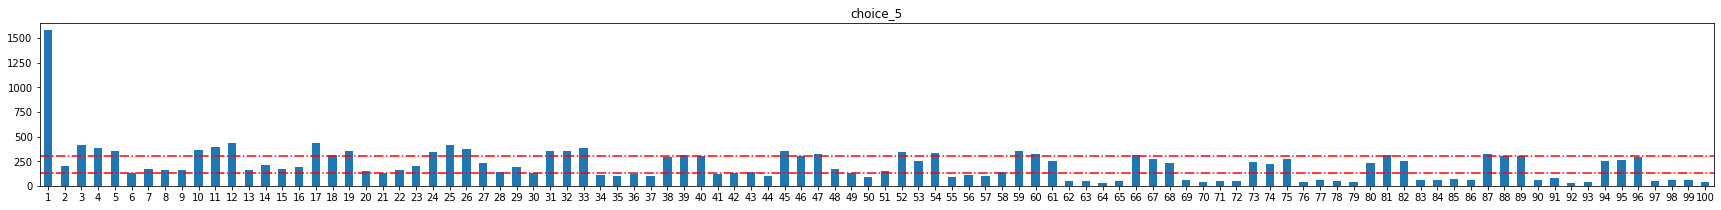

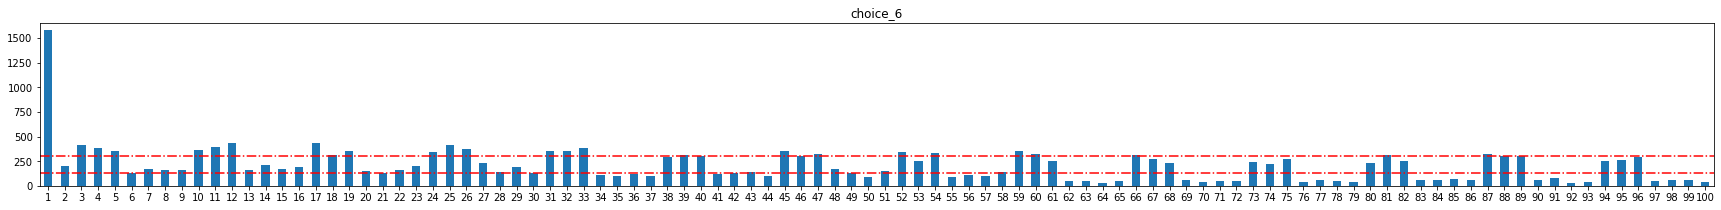

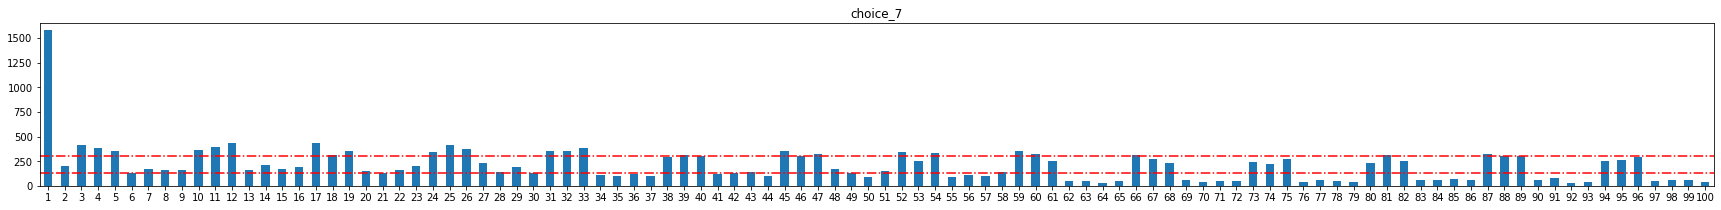

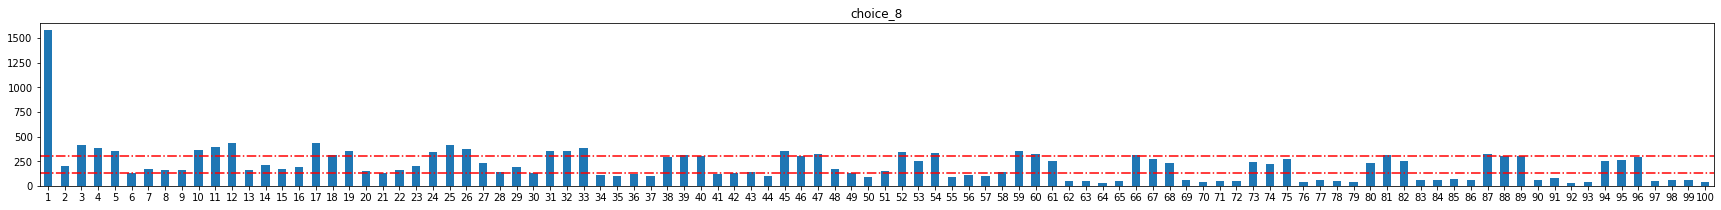

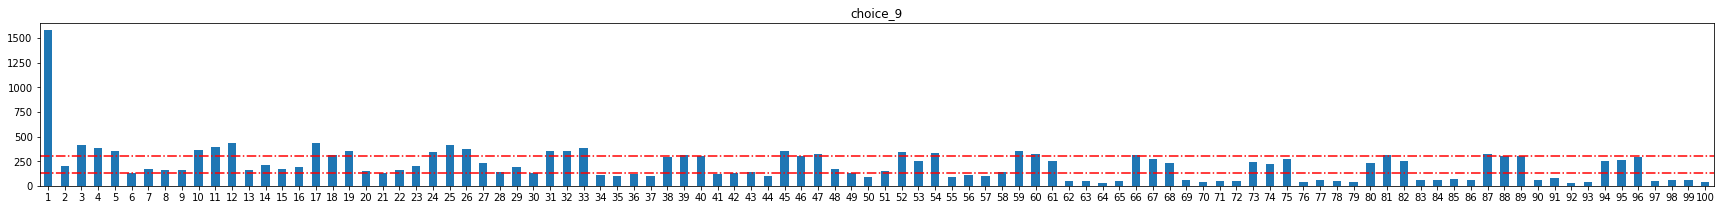

In [78]:
plt.figure()
for column in df_numPeople:
    plt.figure(figsize=(30,3))
    df_numPeople['choice_0'].plot.bar(rot=0)
    plt.title(column)
    plt.axhline(125, c='red', linestyle='-.')
    plt.axhline(300, c='red', linestyle='-.')
    plt.show()